In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
# Load the data from CSV files using relative file paths
mouse_metadata = pd.read_csv("mouse_metadata.csv")
study_results = pd.read_csv("study_results.csv")

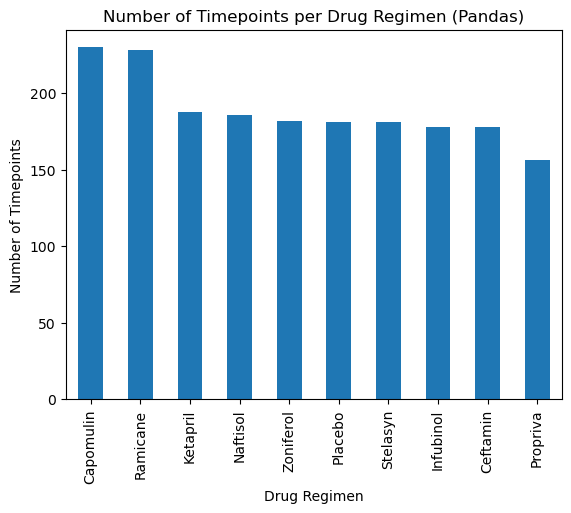

In [3]:
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
cleaned_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"], keep="first")
summary_stats = cleaned_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
# Using Pandas
bar_chart_pandas = cleaned_data["Drug Regimen"].value_counts().plot(kind="bar", title="Number of Timepoints per Drug Regimen (Pandas)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.show()

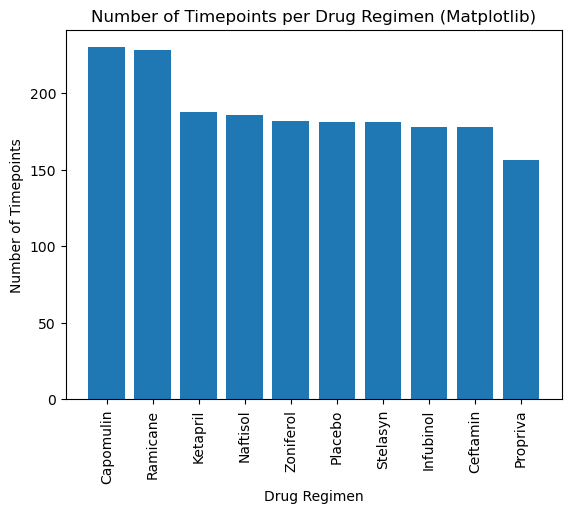

In [4]:
# Using Matplotlib
drug_regimen_counts = cleaned_data["Drug Regimen"].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values)
plt.title("Number of Timepoints per Drug Regimen (Matplotlib)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.xticks(rotation=90)
plt.show()

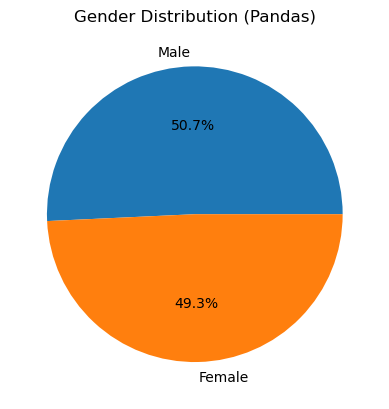

In [5]:
# Using Pandas
gender_distribution_pandas = cleaned_data["Sex"].value_counts()
gender_distribution_pandas.plot(kind="pie", autopct="%1.1f%%", title="Gender Distribution (Pandas)")
plt.ylabel("")
plt.show()

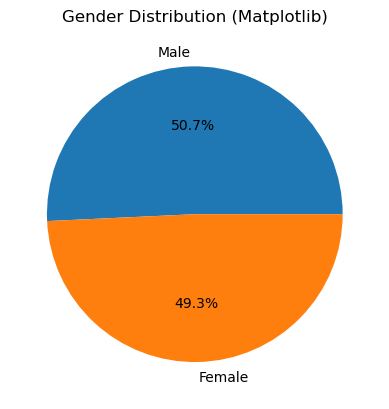

In [6]:

gender_distribution = cleaned_data["Sex"].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index, autopct="%1.1f%%")
plt.title("Gender Distribution (Matplotlib)")
plt.show()

In [7]:
last_timepoint = cleaned_data.groupby("Mouse ID")["Timepoint"].max().reset_index()

In [8]:
merged_last_timepoint = pd.merge(last_timepoint, cleaned_data, on=["Mouse ID", "Timepoint"], how="left")

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

tumor_volume_data = []

In [16]:
for treatment in treatments:
    treatment_data = merged_last_timepoint[merged_last_timepoint["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    print(f"Treatment: {treatment}")
    print(f"IQR: {iqr}")
    print(f"Potential outliers: {outliers.tolist()}")
    
tumor_volume_data.append(treatment_data)

Treatment: Capomulin
IQR: 7.781863460000004
Potential outliers: []
Treatment: Ramicane
IQR: 9.098536719999998
Potential outliers: []
Treatment: Infubinol
IQR: 11.477135160000003
Potential outliers: [36.3213458]
Treatment: Ceftamin
IQR: 15.577752179999997
Potential outliers: []


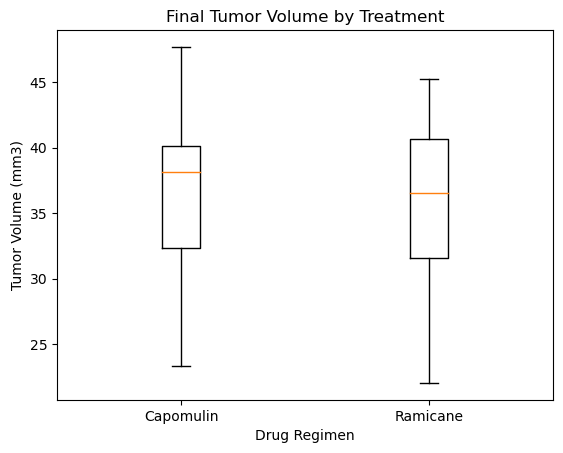

In [19]:
# Choose two treatments (e.g., "Capomulin" and "Ramicane")
selected_treatments = ["Capomulin", "Ramicane"]
tumor_volume_data = [
    merged_last_timepoint[merged_last_timepoint["Drug Regimen"] == "Capomulin"]["Tumor Volume (mm3)"],
    merged_last_timepoint[merged_last_timepoint["Drug Regimen"] == "Ramicane"]["Tumor Volume (mm3)"]
]

# Create a box plot
plt.boxplot(tumor_volume_data, labels=selected_treatments)
plt.title("Final Tumor Volume by Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


In [18]:
print(len(tumor_volume_data))
print(len(treatments))

2
4


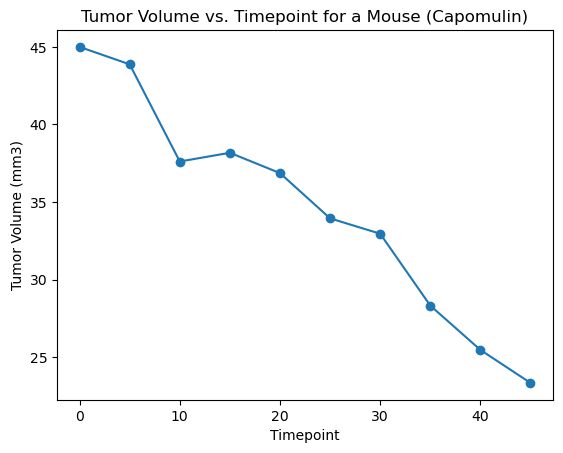

In [20]:
capomulin_data = cleaned_data[cleaned_data["Drug Regimen"] == "Capomulin"]
single_mouse_data = capomulin_data[capomulin_data["Mouse ID"] == "s185"]
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], marker="o")
plt.title("Tumor Volume vs. Timepoint for a Mouse (Capomulin)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()


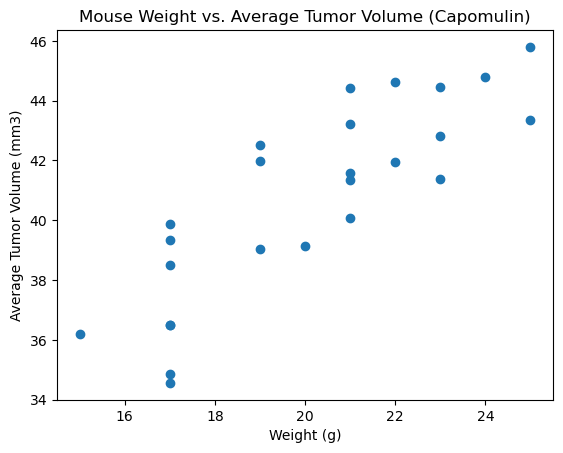

In [21]:
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weight, average_tumor_volume)
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

NameError: name 'regress_values' is not defined

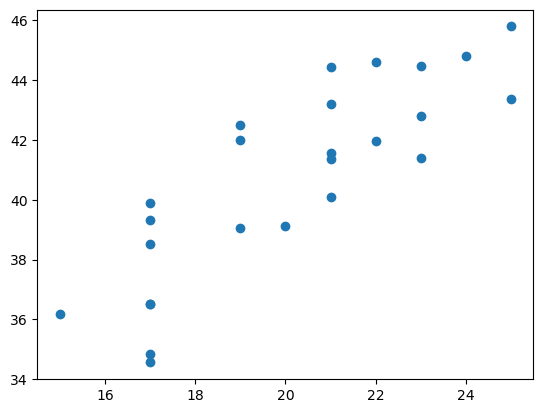

In [22]:

plt.scatter(mouse_weight, average_tumor_volume)
plt.plot(mouse_weight, regress_values, "r-")
plt.title("Mouse Weight vs. Average Tumor Volume (Capomulin)")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.annotate(f"Correlation: {correlation}", (20, 36), fontsize=12, color="red")
plt.show()